In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../../src')

In [3]:
import matplotlib.pyplot as plt
import seaborn           as sns
from scipy import interpolate

import numpy             as np
import pandas            as pd

from bunch import Bunch

import metrics as mt
import plot as pl

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
DATASET_PATH      = '../../datasets/fashion-outfits'
MODEL_RESULT_PATH = f'{DATASET_PATH}/:model-pred-target.csv'
MODEL_NAMES       = [
    'bayes',
    'rn-embedding-Lstm-bid-bigrams',
    'rn-unigrams-embedding',
    'rn-word2vect_avg',
    'tfidf_svd_rn',
    'bert'
]

In [6]:
def save_report(report):
    report \
        .drop_duplicates() \
        .sort_values(by=['model']) \
        .to_csv(f'{DATASET_PATH}/clasification_report.csv',  index=False)

In [7]:
def intersection(lists):
    return set(lists[0]).intersection(*lists[1:])

def models_common_classes(report):
    model_and_class = report \
        .groupby(['model', 'class'])['support'] \
        .count() \
        .reset_index(name='count') \
        [['model', 'class']]

    sets = []
    for model in model_and_class['model'].values:
        sets.append(set(model_and_class[model_and_class['model'] == model]['class'].values))

    return intersection(sets)

In [8]:
def plot_summary(report):
    metrics = ['f1-score', 'precision', 'recall']
    [pl.comparative_box_plot(report, m, 'model') for m in metrics]

In [9]:
def load_results(path, model_names):
    return Bunch({model:pd.read_csv(path.replace(':model', model)) for model in model_names})

In [10]:
model_results = load_results(MODEL_RESULT_PATH, MODEL_NAMES)
report        = mt.MultiClassicationReportGenerator().generate(model_results)

save_report(report)

## Comparativa para todas las clases

**Nota**: No todos los modelos clasificacn las mismas clases. 

<Figure size 800x600 with 1 Axes>

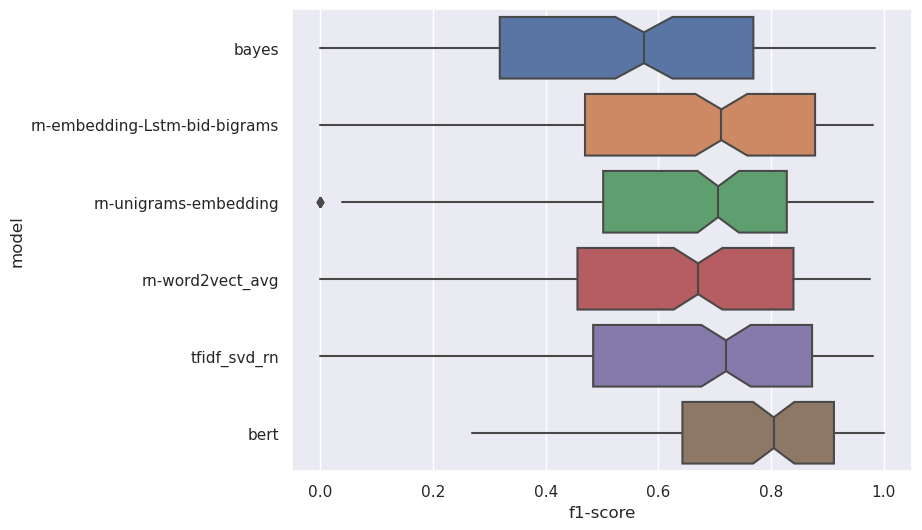

<Figure size 800x600 with 1 Axes>

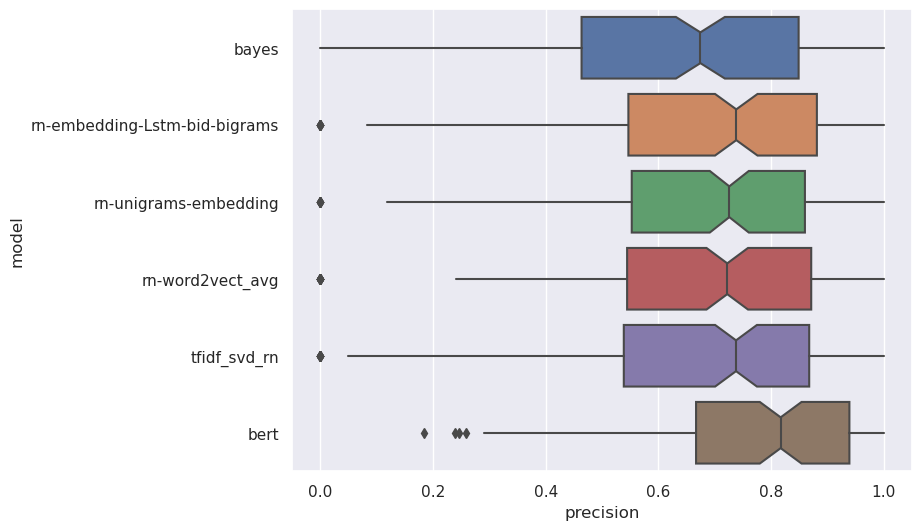

<Figure size 800x600 with 1 Axes>

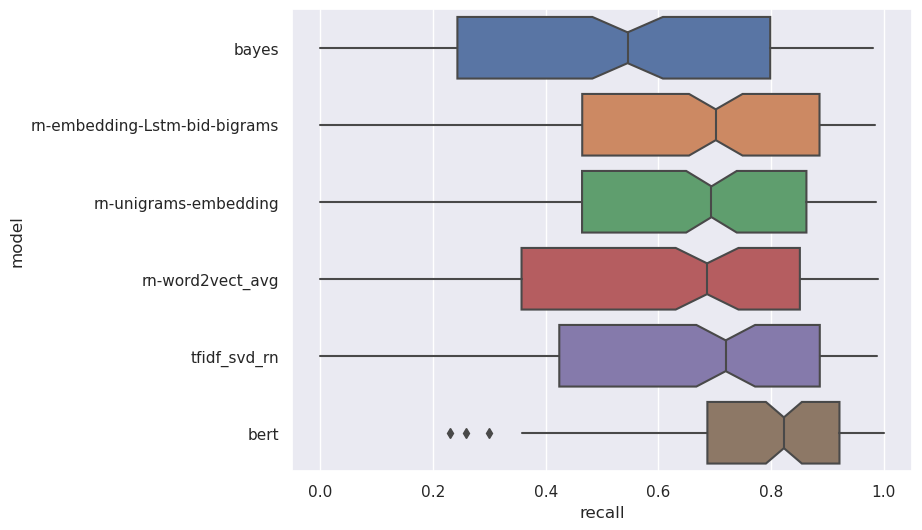

In [11]:
plot_summary(report)

## Comparativa para clases en comun a todos los modelos

In [13]:
common_classes = models_common_classes(report)

Cantidad de calses en comun para todos los modelos:

In [14]:
len(common_classes)

133

<Figure size 800x600 with 1 Axes>

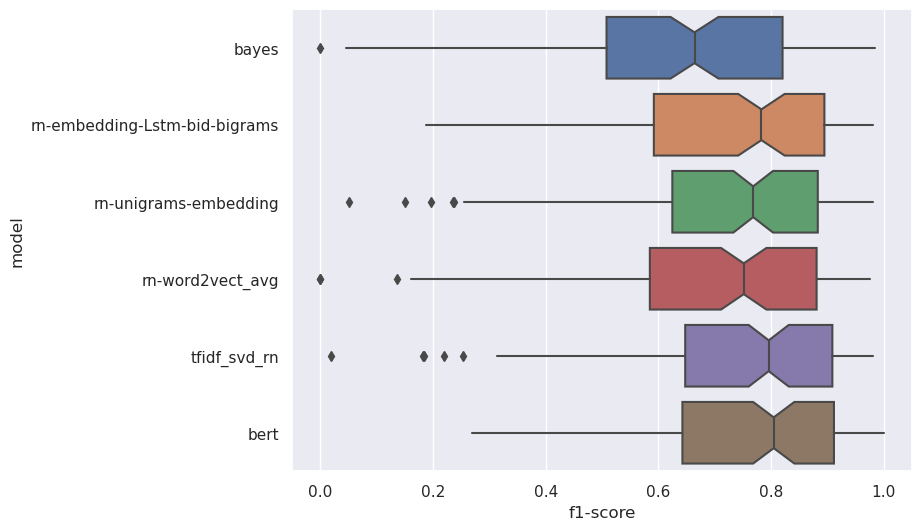

<Figure size 800x600 with 1 Axes>

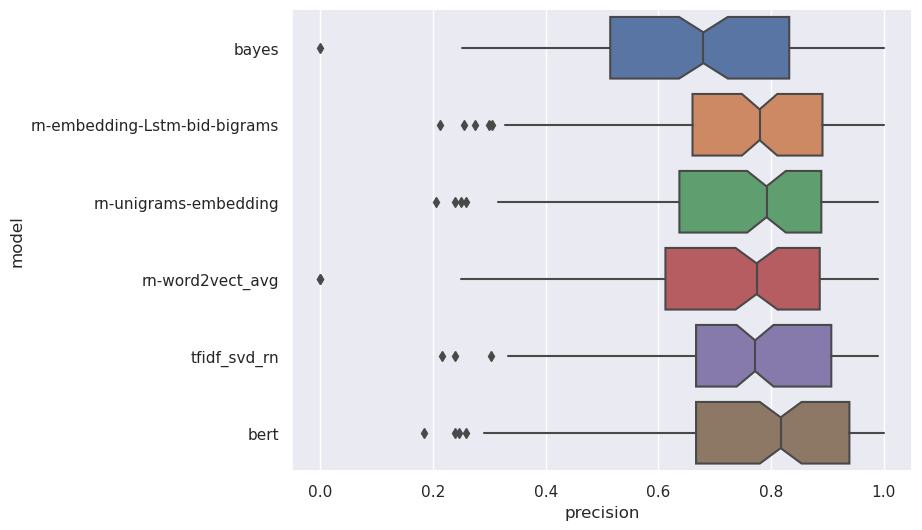

<Figure size 800x600 with 1 Axes>

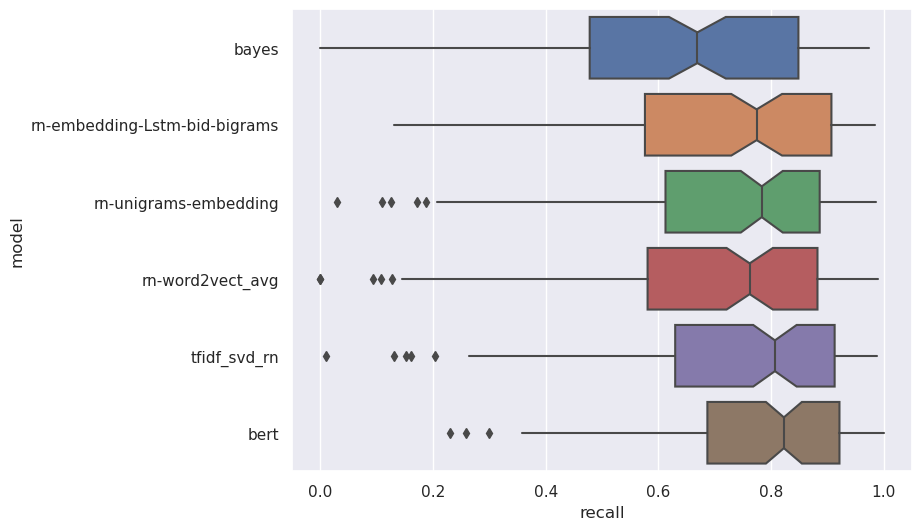

In [15]:
plot_summary(report[report['class'].isin(common_classes)])